# Impatient - Last Journey Trees Statistics

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from itertools import groupby
from matplotlib.ticker import ScalarFormatter
%load_ext line_profiler
%reload_ext autoreload
%autoreload 1
%aimport help_func

In [2]:
forest_table = pd.read_hdf('/data/a/cpac/aurora/reducedtrees.h5', 'ft')
with open("/data/a/cpac/xinliu/reducedtrees/progenitor_idx.txt") as f:
    progenitor_idx = [[int(p) for p in s.strip().split(" ")] if s.strip() != "" else [] for s in f]

#### Establish Globals

In [3]:
n = 10
snap = 99 
snap2 = 98
snap3 = 97
mm_thresh1 = 1/10
mm_thresh2 = 0.3
norm = np.int(2.7*10**9)
xaxis = 'z_nums'
extremum = ''
my_range = [10**13, 10**14]
my_range_str = ["{:.2e}".format(my_range[0]), "{:.2e}".format(my_range[1])]
#bins = [10**9.5, 10**10.5, 10**11.5, 10**12.5, 10**13.5, 10**14.5]
small_bins = [10**11.5, 10**12.5, 10**13.5, 10**14.5]
large_bins = [10**9.5, 10**10.5, 10**11.5, 10**12.5, 10**13.5, 10**14.5]
rangel_bins = [1*10**11, 1.5*10**11, 2.3*10**11, 3.5*10**11, 5.3*10**11, 8.1*10**11, 1.2*10**12, 1.9*10**12, 2.8*10**12, 4.3*10**12, 6.6*10**12, 1*10**13]
rangel_bins2 = np.concatenate(([rangel_bins[0] - 0.25*10**11], [(rangel_bins[i] + rangel_bins[i+1]) / 2 for i in np.arange(len(rangel_bins) -1)], [rangel_bins[-1] + 3.4*10**13]), axis = 0)
norm_tf = True
avg_tf = True
# Convert snapshots to redshifts
redshifts = np.flip(np.array([10.044, 9.8065, 9.5789, 9.3608, 9.1515, 8.7573, 8.5714, 8.3925, 8.0541, 7.8938, 7.7391, 7.4454, 7.3058, 7.04, 6.9134, 6.6718, 6.5564, 6.3358, 6.1277, 6.028, 5.8367, 5.6556, 5.4839, 5.3208, 5.2422, 5.0909, 4.9467, 4.7429, 4.6145, 4.4918, 4.3743, 4.2618, 4.1015, 4.00, 3.8551, 3.763, 3.6313, 3.5475, 3.4273, 3.3133, 3.205, 3.102, 3.0361, 2.9412, 2.8506, 2.7361, 2.6545, 2.5765, 2.4775, 2.4068, 2.3168, 2.2524, 2.1703, 2.0923, 2.018, 1.9472, 1.8797, 1.7994, 1.7384, 1.68, 1.6104, 1.5443, 1.4938, 1.4334, 1.3759, 1.321, 1.2584, 1.2088, 1.152, 1.1069, 1.0552, 1.006, 0.9591, 0.9143, 0.8646, 0.824, 0.7788, 0.7358, 0.6948, 0.6557, 0.6184, 0.5777, 0.5391, 0.5022, 0.4714, 0.4337, 0.4017, 0.3636, 0.3347, 0.3035, 0.2705, 0.2423, 0.2123, 0.1837, 0.1538, 0.1279, 0.1008, 0.0749, 0.0502, 0.0245, 0.00]))

### 1) Mass Evolution

#### 1a) Full mass evolution: one halo

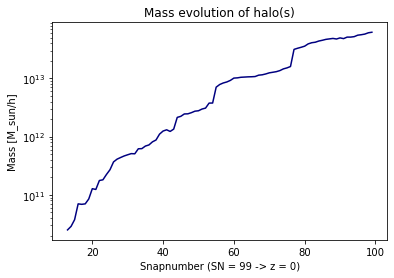

In [97]:
# Find just one halo
halo_idx = 6207994
xaxis = 'snap_nums'
# Track them
time_nums, masses, main_prog_list, major_mergers = help_func.track_evol(halo_idx, redshifts, progenitor_idx, forest_table, x_axis = xaxis)
# Plot them
help_func.plot_evol([time_nums], [masses], x_axis = xaxis, forest_tbl = forest_table)

#### 1b) Full mass evolution: multiple halos

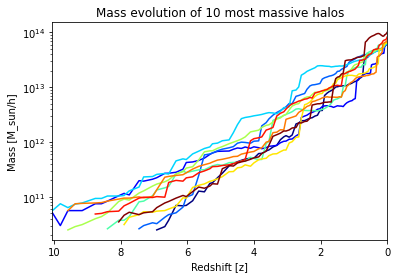

In [4]:
# Find some halos
halo_idx = help_func.find_halos(forest_table, snap, n, extremum = 'max')
# Track them
z_nums, masses, main_prog_list, major_mergers = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table)
# Plot them
help_func.plot_evol(z_nums, masses, "mass_evol_10_max_z", extremum = 'max', quant = n)

#### 1c) Average (binned) mass evolution

Index in track_evol_binned has length:  5
Index in track_evol_multiple has length:  30540
Index in track_evol_multiple has length:  90439
Index in track_evol_multiple has length:  10748
Index in track_evol_multiple has length:  1029
Index in track_evol_multiple has length:  44
Index in track_evol_binned has length:  5
Index in track_evol_multiple has length:  30540
Index in track_evol_multiple has length:  90439
Index in track_evol_multiple has length:  10748
Index in track_evol_multiple has length:  1029
Index in track_evol_multiple has length:  44


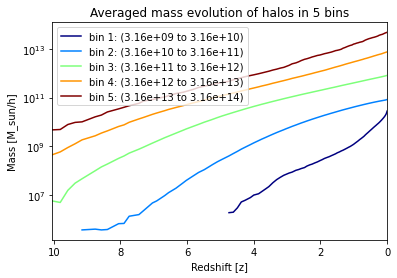

In [4]:
# Find halos and put them in bins
bin_halo_idx = help_func.bin_halos(forest_table, snap, bins)
# Track evolution of those halos
#bin_z_nums, bin_masses, bin_main_prog_list, major_mergers = help_func.track_evol_binned(bin_halo_idx, bins, redshifts, progenitor_idx, forest_table)
# Average the masses for each bin of halos
avg_timesteps, avg_masses = help_func.avg_bins(bin_halo_idx, bins, redshifts, progenitor_idx, forest_table)
# Plot them
help_func.plot_evol(avg_timesteps, avg_masses, forest_table, "mass_evol_binned_avg", bins, avg = avg_tf)

#### 1d) Normalized average mass evolution

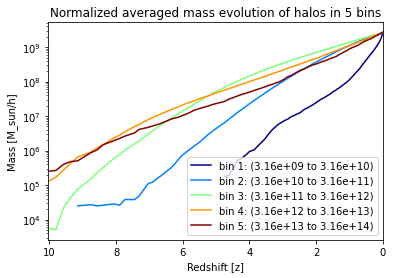

In [110]:
# Find halos and put them in bins
bin_halo_idx = help_func.bin_halos(forest_table, snap, bins)
# Average the masses for each bin of halos
norm_avg_timesteps, norm_avg_masses = help_func.avg_bins(bin_halo_idx, bins, redshifts, progenitor_idx, forest_table, norm_tf)
# Plot them
help_func.plot_evol(norm_avg_timesteps, norm_avg_masses, "mass_evol_binned", bins, avg_tf, norm_tf)

#### 1e) Tracking Major Mergers

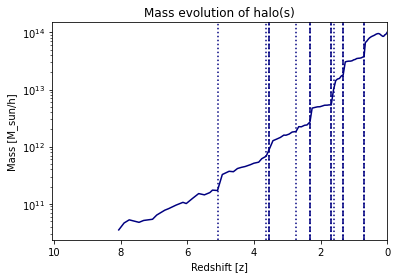

In [73]:
# Choose just one halo, and choose x-axis (z_nums or snap_nums)
halo_id = 6207440
xaxis = 'z_nums'
# Track the halo
snap_nums, masses, main_prog_list, maj_mergers = help_func.track_evol(halo_id, redshifts, prog_idx = progenitor_idx, forest_tbl = forest_table, mm_thresh_small = mm_thresh1, mm_thresh_big = mm_thresh2, x_axis = xaxis)
# Plot them
help_func.plot_evol([snap_nums], [masses], forest_table, major_mergers = [maj_mergers], x_axis = xaxis)

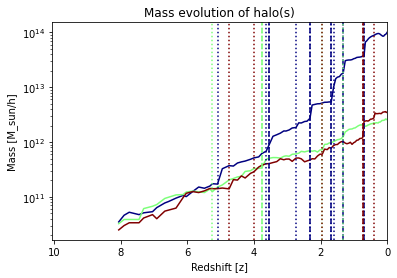

In [4]:
#halo_id = 6207440
halo_idx = [6207440, 6207441, 6207442]
xaxis = 'z_nums'
# Track the halo
snap_nums, masses, main_prog_list, maj_mergers = help_func.track_evol_multiple(halo_idx, redshifts, prog_idx = progenitor_idx, forest_tbl = forest_table, mm_thresh_small = mm_thresh1, mm_thresh_big = mm_thresh2, x_axis = xaxis)
# Plot them
help_func.plot_evol(snap_nums, masses, forest_table, major_mergers = maj_mergers, x_axis = xaxis)

##### Am I sure that it's just a coincidence that all these halos end at exactly z = 8?

### 2) Redshift of LMM (Last Major Merger)

#### Implement for halos in a single range (no bins)

In [4]:
my_range1 = [10**12, 10**13]
halo_idx = help_func.find_halos(forest_table, snap, n, mass_range = my_range1)
xaxis = 'z_nums'
# Track the halo
a_snap_nums, a_masses, a_main_prog_list, a_maj_mergers = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

In [5]:
# Find the LMMs
a_LMMs, a_LMM_snapnums = help_func.find_LMMs(a_maj_mergers, forest_table, xaxis)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


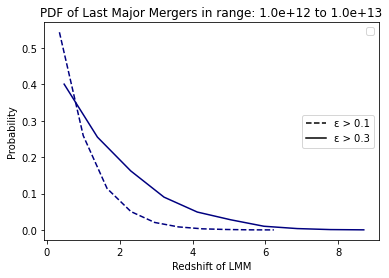

In [6]:
# Plot the PDF
help_func.plot_LMMs([a_LMM_snapnums], mass_range = my_range1, x_axis = xaxis)

#### Implement for bins (WIP)

In [ ]:
# Find and bin the halos
bin_halo_idx = help_func.bin_halos(forest_table, snap, large_bins)
# Track them (and take their averages in the process)
xaxis = 'z_nums'
snap_nums, masses, main_prog_list, maj_mergers = help_func.track_evol_binned(bin_halo_idx, large_bins, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

In [172]:
LMMs, LMM_times = help_func.find_LMMs_binned(maj_mergers, forest_table, xaxis, redshifts)

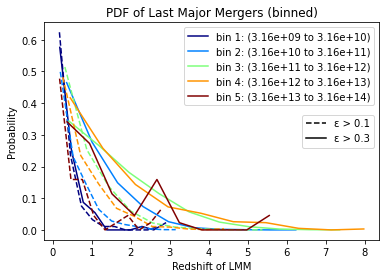

In [175]:
# Plot the PDF
help_func.plot_LMMs(LMM_times, mass_bins = large_bins, x_axis = xaxis)

### Compare this to the individual plots of these ranges

len(major_mergers) in find_LMMs:  392
len(major_mergers[0]) in find_LMMs:  1
major_mergers[0] in find_LMMs:  [1942377]
len(LMM_list) in find_LMMs:  392
norm_factor:  392


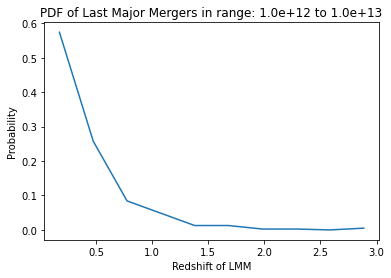

In [13]:
my_range2 = [10**9.5, 10**10.5] # [10**10.5, 10**11.5], [10**11.5, 10**12.5], [10**12.5, 10**13.5], [10**13.5, 10**14.5]
halo_idx2 = help_func.find_halos(forest_table, snap, n, mass_range = my_range2)
xaxis = 'z_nums'
# Track the halo
snap_nums, masses, main_prog_list, maj_mergers = help_func.track_evol_multiple(halo_idx2, redshifts, progenitor_idx, forest_table, x_axis = xaxis)
# Find the LMMs
LMMs, LMM_snapnums = help_func.find_LMMs(maj_mergers, forest_table, xaxis)
# Plot the PDF
help_func.plot_LMMs([LMM_snapnums], mass_range = my_range1, x_axis = xaxis)

#### Plot CDF (Cumulative Distribution Function)

In [4]:
# Find and bin the halos
bin_halo_idx = help_func.bin_halos(forest_table, snap, small_bins)
# Track them (and take their averages in the process)
xaxis = 'z_nums'
binned_snap_nums, binned_masses, binned_main_prog_list, binned_maj_mergers = help_func.track_evol_binned(bin_halo_idx, small_bins, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

In [8]:
len(bin_halo_idx[2])

1737

In [9]:
binned_LMMs, binned_LMM_times = help_func.find_LMMs_binned(binned_maj_mergers, forest_table, xaxis)

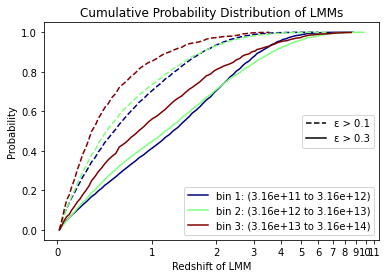

In [10]:
help_func.plot_CDF(binned_LMM_times, small_bins, redshifts)

### 3) Mass Growth Rate

#### Run the function (for non-binned idx of halo ids)

In [11]:
# Find some halos in a range
range1 = [10**13, 10**14]
halo_idx = help_func.find_halos(forest_table, snap, mass_range = range1)

In [36]:
len(halo_idx)

6197

In [13]:
# Track their evolution
%time
timesteps, masses, main_prog_list, maj_mergers = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table, x_axis = 'z_nums')

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 13.1 µs


In [31]:
def calc_mass_growth_rate(timesteps, masses, main_prog_list, prog_idx, forest_tbl):
    #%%time
    alpha_list = []
    
    # Change z_values to lookback times
    cosmo = FlatLambdaCDM(H0=67.66, Om0=0.310)
    lookback_times = np.array(cosmo.lookback_time(timesteps))
    age = float(cosmo.age(0) / u.Gyr)
    ages_list = [age for i in np.arange(len(lookback_times[0]))]
    times = [ages_list - lt for lt in lookback_times]
    
    # Loop through each halo
    for i in np.arange(len(masses)):
        
        # Mask up, friends!
        mask = (masses[i] > 10**12)
        masses_masked = np.array(masses)[i][mask]
        times_masked = times[i][mask]
        main_prog_list[i] = np.append(main_prog_list[i], np.zeros(101 - len(main_prog_list[i])))[mask]
        
        # Calculate alphas
        t_B = times_masked[0:(len(masses_masked) - 1)]
        M_B = masses_masked[0:(len(masses_masked) - 1)]
        t_A = times_masked[1:]
        M_A = masses_masked[1:]
        alpha = (t_B + t_A) * (M_B - M_A) / ((t_B - t_A)*(M_B + M_A))
        alpha_std = alpha[np.isnan(alpha) == False]
        alpha_list.append(alpha_std)

    return alpha_list

In [33]:
# Calculate the alphas
%time alphas = calc_mass_growth_rate(timesteps, masses, main_prog_list, progenitor_idx, forest_table)

CPU times: user 13.5 s, sys: 103 ms, total: 13.6 s
Wall time: 13.6 s


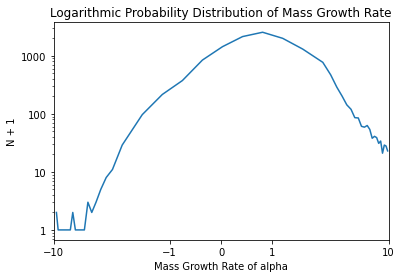

In [27]:
# Plot them
a = help_func.plot_distrib(alphas, "Mass Growth Rate", "alpha", n_hist_bins = 50, zoom = True, log = True)

#### Attempt with bins

In [38]:
# Find some halos and put them in bins
%time bin_halo_idx = help_func.bin_halos(forest_table, snap, large_bins)

CPU times: user 54.3 ms, sys: 5.9 ms, total: 60.2 ms
Wall time: 22.3 ms


In [39]:
# Track their evolution
%time timesteps, masses, main_prog_list, maj_mergers = help_func.track_evol_binned(bin_halo_idx, large_bins, redshifts, progenitor_idx, forest_table, x_axis = 'z_nums')

CPU times: user 2min 20s, sys: 3.09 s, total: 2min 23s
Wall time: 2min 21s


In [ ]:
# Calculate the alphas
%prun alphas = help_func.calc_BINNED_mass_growth_rate(timesteps, masses, main_prog_list, progenitor_idx, forest_table)


In Calc Mass_Growth_Rate

In Calc Mass_Growth_Rate


/home/acossairt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: operands could not be broadcast together with shapes (0,) (10,) 

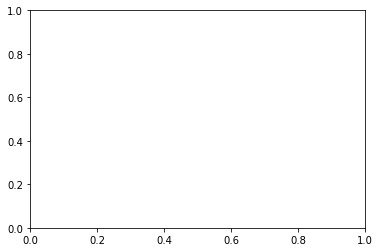

In [144]:
# Plot them
a = help_func.plot_distrib(alphas, "Mass Growth Rate", "alpha", nbins = 50, zoom = False)

In [77]:
srisawat_bins = [-10, -2, -1, 0, 1, 2, 10]

### 4) Length of Main Branches

In [203]:
# Find and bin the halos
bin_halo_idx = help_func.bin_halos(forest_table, snap, rangel_bins2)
# Track them (and take their averages in the process)
xaxis = 'z_nums'
binned_snap_nums, binned_masses, binned_main_prog_list, binned_maj_mergers = help_func.track_evol_binned(bin_halo_idx, rangel_bins2, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

bins:  [7.500e+10 1.250e+11 1.900e+11 2.900e+11 4.400e+11 6.700e+11 1.005e+12
 1.550e+12 2.350e+12 3.550e+12 5.450e+12 8.300e+12 4.400e+13]
i is:  0
len(major_mergers): 821
i is:  1
len(major_mergers): 1452
i is:  2
len(major_mergers): 2393
i is:  3
len(major_mergers): 2819
i is:  4
len(major_mergers): 2488
i is:  5
len(major_mergers): 1746
i is:  6
len(major_mergers): 1282
i is:  7
len(major_mergers): 843
i is:  8
len(major_mergers): 551
i is:  9
len(major_mergers): 376
i is:  10
len(major_mergers): 229
i is:  11
len(major_mergers): 312


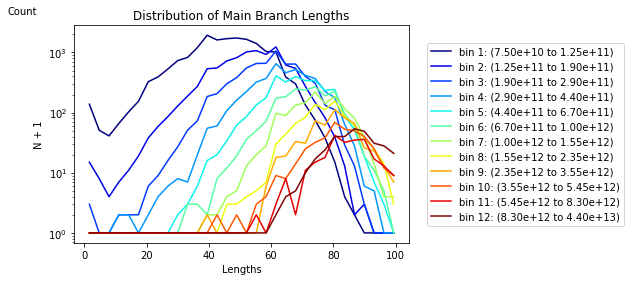

In [206]:
help_func.plot_main_branch_length(binned_main_prog_list, hist_bins = rangel_bins2, log = True)

#### Just one main branch

In [81]:
# Find some halos
halo_idx = help_func.find_halos(forest_table, snap, mass_range = [8.3*10**12, 4.4*10**13])
# Track them
z_nums, masses, main_prog_list, major_mergers = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table)

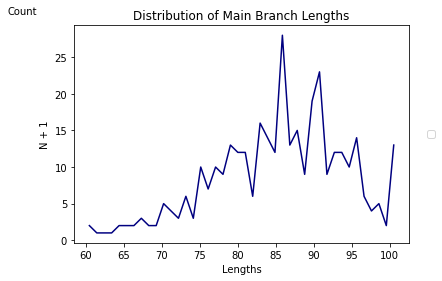

In [153]:
help_func.plot_main_branch_length([main_prog_list], log = False, dist_or_hist = 'dist')

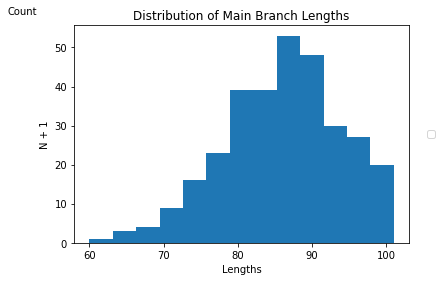

In [158]:
help_func.plot_main_branch_length([main_prog_list], log = False, dist_or_hist = 'hist', n_bins = 'auto')

#### Or, PDF (a little funky currently)

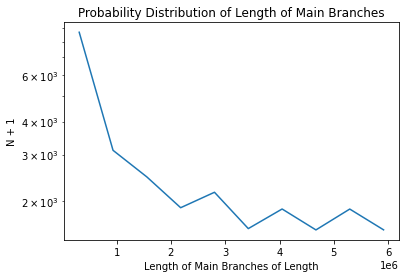

In [142]:
help_func.plot_distrib(main_prog_list, "Length of Main Branches", "Length")

### 5) Cumulative Number of Mergers

#### For just one range of halos

In [53]:
# Find some halos
halo_id = 6207994
# Track them
z_nums, masses, main_prog_list, major_mergers = help_func.track_evol(halo_id, redshifts, progenitor_idx, forest_table)

In [133]:
cum_mms = help_func.calc_cum_maj_mergers(major_mergers, redshifts, forest_table)

#### For multiple halos

In [111]:
n = 10
halo_idx = help_func.find_halos(forest_table, snap, n, extremum = 'max')
xaxis = 'z_nums'
z_nums, masses, main_prog_list, maj_mergers = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table, mm_thresh_small = mm_thresh1, mm_thresh_big = mm_thresh2, x_axis = xaxis)

In [129]:
averages = help_func.avg_cum_maj_mergers(maj_mergers, redshifts, forest_table)

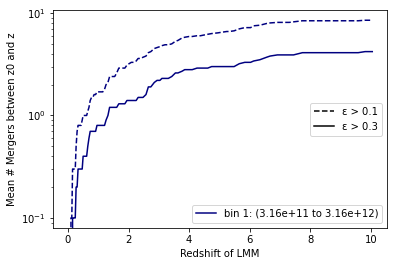

In [131]:
help_func.plot_mean_num_mms([averages], small_bins, redshifts)

#### For binned halos

In [4]:
# Find and bin the halos
#my_bins = [10**13.2, 10**13.5, 10**14.5]
bin_halo_idx = help_func.bin_halos(forest_table, snap, small_bins)
# Track them (and take their averages in the process)
xaxis = 'z_nums'
binned_snap_nums, binned_masses, binned_main_prog_list, binned_maj_mergers = help_func.track_evol_binned(bin_halo_idx, small_bins, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

In [8]:
binned_avgs = help_func.binned_avg_cum_maj_mergers(binned_maj_mergers, redshifts, forest_table)

In avg_cum_maj_mergers
*** KeyboardInterrupt exception caught in code being profiled.

Timer unit: 1e-06 s

In [ ]:
help_func.plot_mean_num_mms(binned_avgs, my_bins, redshifts)

### Various Experiments

In [63]:
mask = [(mm_times[i] <= 3) for i in np.arange(len(mm_times))]
mask

[True, True, False, True, True, False]

In [68]:
mask.count(True)

4

In [8]:
mask = [(mm_times[i] <= z) for i, z in zip(np.arange(len(mm_times)), redshifts)]
mask

[False, False, False, True, False, False]

In [96]:
a = [0, 0, 1, 1, 2, 3, 5, 6, 8]
b = [0, 1, 1, 1, 1, 2, 6, 7, 7]
c = [1, 1, 2, 3, 3, 4, 5, 6, 7]
d = [1, 2, 2, 2, 3, 3, 4, 5, 6]
e = [[a,b], [c,d]]
print(e)
np.average(e, axis = 0)
#sum(ab)
#mean(a, b)

[[[0, 0, 1, 1, 2, 3, 5, 6, 8], [0, 1, 1, 1, 1, 2, 6, 7, 7]], [[1, 1, 2, 3, 3, 4, 5, 6, 7], [1, 2, 2, 2, 3, 3, 4, 5, 6]]]


array([[0.5, 0.5, 1.5, 2. , 2.5, 3.5, 5. , 6. , 7.5],
       [0.5, 1.5, 1.5, 1.5, 2. , 2.5, 5. , 6. , 6.5]])

In [100]:
[e[i][0] for i in np.arange(len(e))]

[[0, 0, 1, 1, 2, 3, 5, 6, 8], [1, 1, 2, 3, 3, 4, 5, 6, 7]]

### Histogram experiments

In [168]:
a = [1, 1, 2, 5, 0, 9, 0, 0, 8, 7, 1]
nbins = np.max(a) - np.min(a)
print(nbins)
hist = np.histogram(a, bins = nbins)
hist

9


(array([3, 3, 1, 0, 0, 1, 0, 1, 2]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [169]:
bin_centers = [(hist[1][i] + hist[1][i + 1])/2 for i in np.arange(len(hist[1]) - 1)]
bin_centers

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]

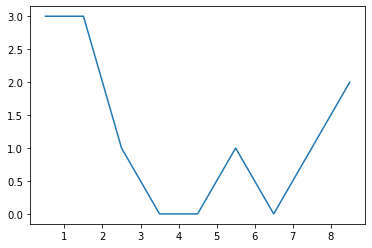

In [170]:
fig, ax = plt.subplots()
ax.plot(bin_centers, hist[0])

In [36]:
arr = np.array([0, 4, 7, 2, 9, 8, 10, 3, 2, 5])

In [40]:
sorted_arr = np.argsort(a)[::-1]
sorted_arr

array([6, 4, 5, 2, 9, 1, 7, 8, 3, 0])

In [43]:
indices = np.array(a)[sorted_arr]
indices

array([10,  9,  8,  7,  5,  4,  3,  2,  2,  0])

In [44]:
np.argmax(indices)

0

In [16]:
max(a)

10